In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [3]:
#Importing dataset and defining path variables
path = './data/'
smallfile = 'clean_ipo_stock_2010_2018.csv'
largefile = 'master_data.csv'

df_ipo_small = pd.read_csv(path + smallfile, index_col='ipoDate')
df_ipo_large = pd.read_csv(path + largefile, index_col= 'ipoDate')

df_ipo_small

,Price,employees,CEO_age,intra_day_up,intra_week_up,intra_month_up,Symbol,sector,IPO_weekday,firstday_volume,inweek_volume,inmonth_volume
ipoDate,,,,,,,,,,,,
2010-01-26,6.3,128.0,57.460211,1,1,0,AMCF,Energy,1,9.555630e+05,5.932224e+06,6.363594e+06
2010-01-22,20.0,3.0,60.000000,1,1,1,CHSP,Real Estate,4,3.492458e+06,6.004700e+05,1.911825e+06
2010-02-11,13.0,1486.0,50.000000,1,1,1,GNRC,Industrials,3,1.689209e+07,2.179070e+06,4.953062e+06
2010-02-11,15.0,568.0,62.000000,0,1,0,QNST,Technology,3,5.372077e+06,3.361885e+06,7.002853e+06
2010-02-10,20.0,6.0,61.000000,1,1,1,TRNO,Real Estate,2,4.515261e+06,7.613210e+05,1.937712e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-12,13.0,2559.0,48.000000,0,1,0,TME,Technology,2,6.028340e+07,1.319195e+08,1.973692e+08
2018-12-07,11.0,25.0,64.000000,0,0,0,THOR,Healthcare,4,9.415332e+06,7.682246e+06,1.796531e+07
2018-12-07,4.0,11.0,51.000000,0,0,0,DMAC,Healthcare,4,1.124000e+06,1.950800e+06,2.791700e+06


In [4]:
#Dropping Symbol column
df_ipo_small.drop('Symbol', inplace=True, axis = 1)
df_ipo_large.drop('Symbol', inplace=True, axis = 1)

#One hot encoding sector and weekday cols
categorical_cols = ['sector', 'IPO_weekday'] 
df_ipo_small = pd.get_dummies(df_ipo_small, columns = categorical_cols)
df_ipo_large = pd.get_dummies(df_ipo_large, columns = categorical_cols)
df_ipo_large

,index,Price,employees,CEO_age,intra_day_up,intra_week_up,intra_month_up,firstday_volume,inweek_volume,inmonth_volume,...,sector_Public Utilities,sector_Real Estate,sector_Technology,sector_Transportation,sector_Utilities,IPO_weekday_0,IPO_weekday_1,IPO_weekday_2,IPO_weekday_3,IPO_weekday_4
ipoDate,,,,,,,,,,,,,,,,,,,,,
2010-01-26,0,6.3000,128.000000,57.460211,1,1,0,955563.0,5932224.0,6363594.0,...,0,0,0,0,0,0,1,0,0,0
2010-01-22,1,20.0000,3.000000,60.000000,1,1,1,3492458.0,600470.0,1911825.0,...,0,1,0,0,0,0,0,0,0,1
2010-02-11,2,13.0000,1486.000000,50.000000,1,1,1,16892087.0,2179070.0,4953062.0,...,0,0,0,0,0,0,0,0,1,0
2010-02-11,3,15.0000,568.000000,62.000000,0,1,0,5372077.0,3361885.0,7002853.0,...,0,0,1,0,0,0,0,0,1,0
2010-02-10,4,20.0000,6.000000,61.000000,1,1,1,4515261.0,761321.0,1937712.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/3/07 0:00,3749,7.0500,28.000000,50.000000,0,0,0,26300.0,202800.0,657658.0,...,0,0,0,0,0,0,0,1,0,0
7/30/97 0:00,3751,20.6667,7293.424463,54.812500,0,0,0,4703100.0,2526750.0,7261650.0,...,0,0,0,1,0,0,0,1,0,0
4/11/14 0:00,3752,23.7300,5473.000000,49.000000,0,0,0,5765164.0,2644271.0,6955747.0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
#Normalizing numerical variables for ML modeling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized_data_small = scaler.fit_transform(df_ipo_small)
normalized_data_large = scaler.fit_transform(df_ipo_large)

df_ipo_small_norm = pd.DataFrame(normalized_data_small, columns=df_ipo_small.columns)
df_ipo_large_norm = pd.DataFrame(normalized_data_large, columns=df_ipo_large.columns)

df_ipo_large_norm

,index,Price,employees,CEO_age,intra_day_up,intra_week_up,intra_month_up,firstday_volume,inweek_volume,inmonth_volume,...,sector_Public Utilities,sector_Real Estate,sector_Technology,sector_Transportation,sector_Utilities,IPO_weekday_0,IPO_weekday_1,IPO_weekday_2,IPO_weekday_3,IPO_weekday_4
0,0.000000,1.650060e-09,0.000226,0.499406,1.0,1.0,0.0,5.588088e-06,4.696931e-06,7.311114e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000266,5.238514e-09,0.000005,0.537313,1.0,1.0,1.0,2.042373e-05,4.754315e-07,2.196490e-07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000532,3.404998e-09,0.002625,0.388060,1.0,1.0,1.0,9.878413e-05,1.725313e-06,5.690558e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000798,3.928860e-09,0.001004,0.567164,0.0,1.0,0.0,3.141565e-05,2.661825e-06,8.045557e-07,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.001064,5.238514e-09,0.000011,0.552239,1.0,1.0,1.0,2.640504e-05,6.027878e-07,2.226232e-07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,0.997340,1.846508e-09,0.000049,0.388060,0.0,0.0,0.0,1.538012e-07,1.605701e-07,7.555813e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3878,0.997872,5.413144e-09,0.012886,0.459888,0.0,0.0,0.0,2.750351e-05,2.000594e-06,8.342888e-07,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3879,0.998138,6.215517e-09,0.009670,0.373134,0.0,0.0,0.0,3.371441e-05,2.093643e-06,7.991437e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3880,0.999468,2.684688e-09,0.015724,0.492537,0.0,0.0,0.0,3.972763e-05,1.547811e-06,8.058703e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [100]:
#Logistic Regression Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import metrics

X = df_ipo_small_norm.drop(columns= ['intra_day_up', 'intra_week_up', 'intra_month_up'])
y_d = np.array(df_ipo_small_norm.intra_day_up)
y_w = np.array(df_ipo_small_norm.intra_week_up)
y_m = np.array(df_ipo_small.intra_month_up)

#Looking at class imbalances
print('Class distribution: \n', df_ipo_small_norm[['intra_day_up','intra_week_up', 'intra_month_up']].mean())

#Dealing with class imbalances by oversampling minority class (underperforming IPOs)
sm = SMOTE(random_state=27)
X_d_bal, y_d_bal = sm.fit_resample(X, y_d)
X_w_bal, y_w_bal = sm.fit_resample(X, y_w)
X_m_bal, y_m_bal = sm.fit_resample(X, y_m)

#Printing mean of y values (should be 0.5, since data should now be balanced)
print('Class distribution after SMOTE: {:.2f}'.format(y_m_bal.mean()))

#Model accuracy does not improve with SMOTE, but recall and balanced acc does.

# setting up stratified testing and training sets
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d_bal, y_d_bal, test_size=0.2, random_state=0, stratify = y_d_bal)
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w_bal, y_w_bal, test_size=0.2, random_state=0, stratify = y_w_bal)
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m_bal, y_m_bal, test_size=0.2, random_state=0, stratify = y_m_bal)

Class distribution: 
 intra_day_up      0.386444
intra_week_up     0.412852
intra_month_up    0.423415
dtype: float64
Class distribution after SMOTE: 0.50


In [101]:
#Fitting Logistic Regression Models
logreg_d = LogisticRegression()
logreg_w = LogisticRegression()
logreg_m = LogisticRegression()

logreg_d.fit(X_d_train, y_d_train)
logreg_w.fit(X_w_train, y_w_train)
logreg_m.fit(X_m_train, y_m_train)


LogisticRegression()

In [102]:
y_d_pred = logreg_d.predict(X_d_test)
y_w_pred = logreg_w.predict(X_w_test)
y_m_pred = logreg_m.predict(X_m_test)
print('Accuracy of logistic regression classifier on daily up test set: {:.2f}'.format(logreg_d.score(X_d_test, y_d_test)))
print('Accuracy of logistic regression classifier on weekly up test set: {:.2f}'.format(logreg_w.score(X_w_test, y_w_test)))
print('Accuracy of logistic regression classifier on monthly up test set: {:.2f}'.format(logreg_m.score(X_m_test, y_m_test)))

Accuracy of logistic regression classifier on daily up test set: 0.64
Accuracy of logistic regression classifier on weekly up test set: 0.67
Accuracy of logistic regression classifier on monthly up test set: 0.55


In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


print(classification_report(y_w_test, y_w_pred))
confusion_matrix = confusion_matrix(y_w_test, y_w_pred)

#TN #FP
#FN #TP
print(confusion_matrix)

              precision    recall  f1-score   support

         0.0       0.65      0.73      0.69       134
         1.0       0.69      0.60      0.64       133

    accuracy                           0.67       267
   macro avg       0.67      0.67      0.67       267
weighted avg       0.67      0.67      0.67       267

[[98 36]
 [53 80]]


In [112]:
from sklearn.model_selection import RandomizedSearchCV
#Creating grid search for Random Forest Hyperparameter Tuning
#Taken from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [122]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base models to tune for each predicted label
rf_d = RandomForestClassifier()
rf_w = RandomForestClassifier()
rf_m = RandomForestClassifier()

# Random search of parameters, using 10 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random_d = RandomizedSearchCV(estimator = rf_d, param_distributions = random_grid, n_iter = 100, cv = 10, random_state=42, n_jobs = -1)
rf_random_w = RandomizedSearchCV(estimator = rf_w, param_distributions = random_grid, n_iter = 100, cv = 10, random_state=42, n_jobs = -1)
rf_random_m = RandomizedSearchCV(estimator = rf_m, param_distributions = random_grid, n_iter = 100, cv = 10, random_state=42, n_jobs = -1)

# Fit all random search models (Takes 6 - 7 min to run)
rf_random_d.fit(X_d_train, y_d_train)
rf_random_w.fit(X_w_train, y_w_train)
rf_random_m.fit(X_m_train, y_m_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42)

In [123]:
#Evaluating accuracy of rf models
best_random_d = rf_random_d.best_estimator_
best_random_w = rf_random_w.best_estimator_
best_random_m = rf_random_m.best_estimator_

#Creating random model predictions
predictions_d = best_random_d.predict(X_d_test)
predictions_w = best_random_d.predict(X_w_test)
predictions_m = best_random_d.predict(X_m_test)

#Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

print('Accuracy of random forest classifier on daily up test set: {:.2f}'.format(balanced_accuracy_score(y_d_test, predictions_d)))
print('Accuracy of random forest classifier on weekly up test set: {:.2f}'.format(balanced_accuracy_score(y_w_test, predictions_w)))
print('Accuracy of random forest classifier on monthly up test set: {:.2f}'.format(balanced_accuracy_score(y_m_test, predictions_m)))

Accuracy of random forest classifier on daily up test set: 0.72
Accuracy of random forest classifier on weekly up test set: 0.83
Accuracy of random forest classifier on monthly up test set: 0.74


In [126]:
from xgboost import XGBClassifier

#Creating XGB models for each predicted label
xgb_d = XGBClassifier(objective="binary:logistic")
xgb_w = XGBClassifier(objective="binary:logistic")
xgb_m = XGBClassifier(objective="binary:logistic")

#Defining search grid for randomized search
param_grid = {
    "max_depth": [int(x) for x in np.linspace(10, 150, num = 20)],
    "learning_rate": [0.1, 0.01, 0.05, 0.2, 0.25, 0.3],
    "gamma": [0, 0.1, 0.25, 0.5, 1],
    "reg_lambda": [0, 1, 2, 5, 10],
    "scale_pos_weight": [1, 2, 3, 4, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

#Fitting randomized search to XGB models
xgb_random_d = RandomizedSearchCV(estimator = xgb_d, param_distributions = param_grid, n_iter = 100, cv = 10, random_state=42, n_jobs = -1)
xgb_random_w = RandomizedSearchCV(estimator = xgb_w, param_distributions = param_grid, n_iter = 100, cv = 10, random_state=42, n_jobs = -1)
xgb_random_m = RandomizedSearchCV(estimator = xgb_m, param_distributions = param_grid, n_iter = 100, cv = 10, random_state=42, n_jobs = -1)

#Fitting search to training data
xgb_random_d.fit(X_d_train, y_d_train)
xgb_random_w.fit(X_w_train, y_w_train)
xgb_random_m.fit(X_m_train, y_m_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5],
                                        'gamma': [0, 0.1, 0.25, 0.5, 1],
                                        'learning_rate': [0.1, 0.01, 0.05, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [10, 17, 24, 32, 39, 46,
                                                      54, 61, 68, 76, 83, 91,
                                                      98, 105, 113, 120, 127,
                                                      135, 142, 150],
                                        'reg_lambda': [0, 1, 2, 5, 10],
                                        'scale_pos_weight': [1, 2, 3, 4, 5],
                                        'subsample': [0.8]},
                   random_state=42)

In [127]:
#Evaluating accuracy of xgb models
best_random_d = xgb_random_d.best_estimator_
best_random_w = xgb_random_w.best_estimator_
best_random_m = xgb_random_m.best_estimator_

#Creating random model predictions
predictions_d = best_random_d.predict(X_d_test)
predictions_w = best_random_d.predict(X_w_test)
predictions_m = best_random_d.predict(X_m_test)

#Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

print('Accuracy of xgboost classifier on daily up test set: {:.2f}'.format(balanced_accuracy_score(y_d_test, predictions_d)))
print('Accuracy of xgboost classifier on weekly up test set: {:.2f}'.format(balanced_accuracy_score(y_w_test, predictions_w)))
print('Accuracy of xgboost classifier on monthly up test set: {:.2f}'.format(balanced_accuracy_score(y_m_test, predictions_m)))

Accuracy of xgboost classifier on daily up test set: 0.72
Accuracy of xgboost classifier on weekly up test set: 0.83
Accuracy of xgboost classifier on monthly up test set: 0.75


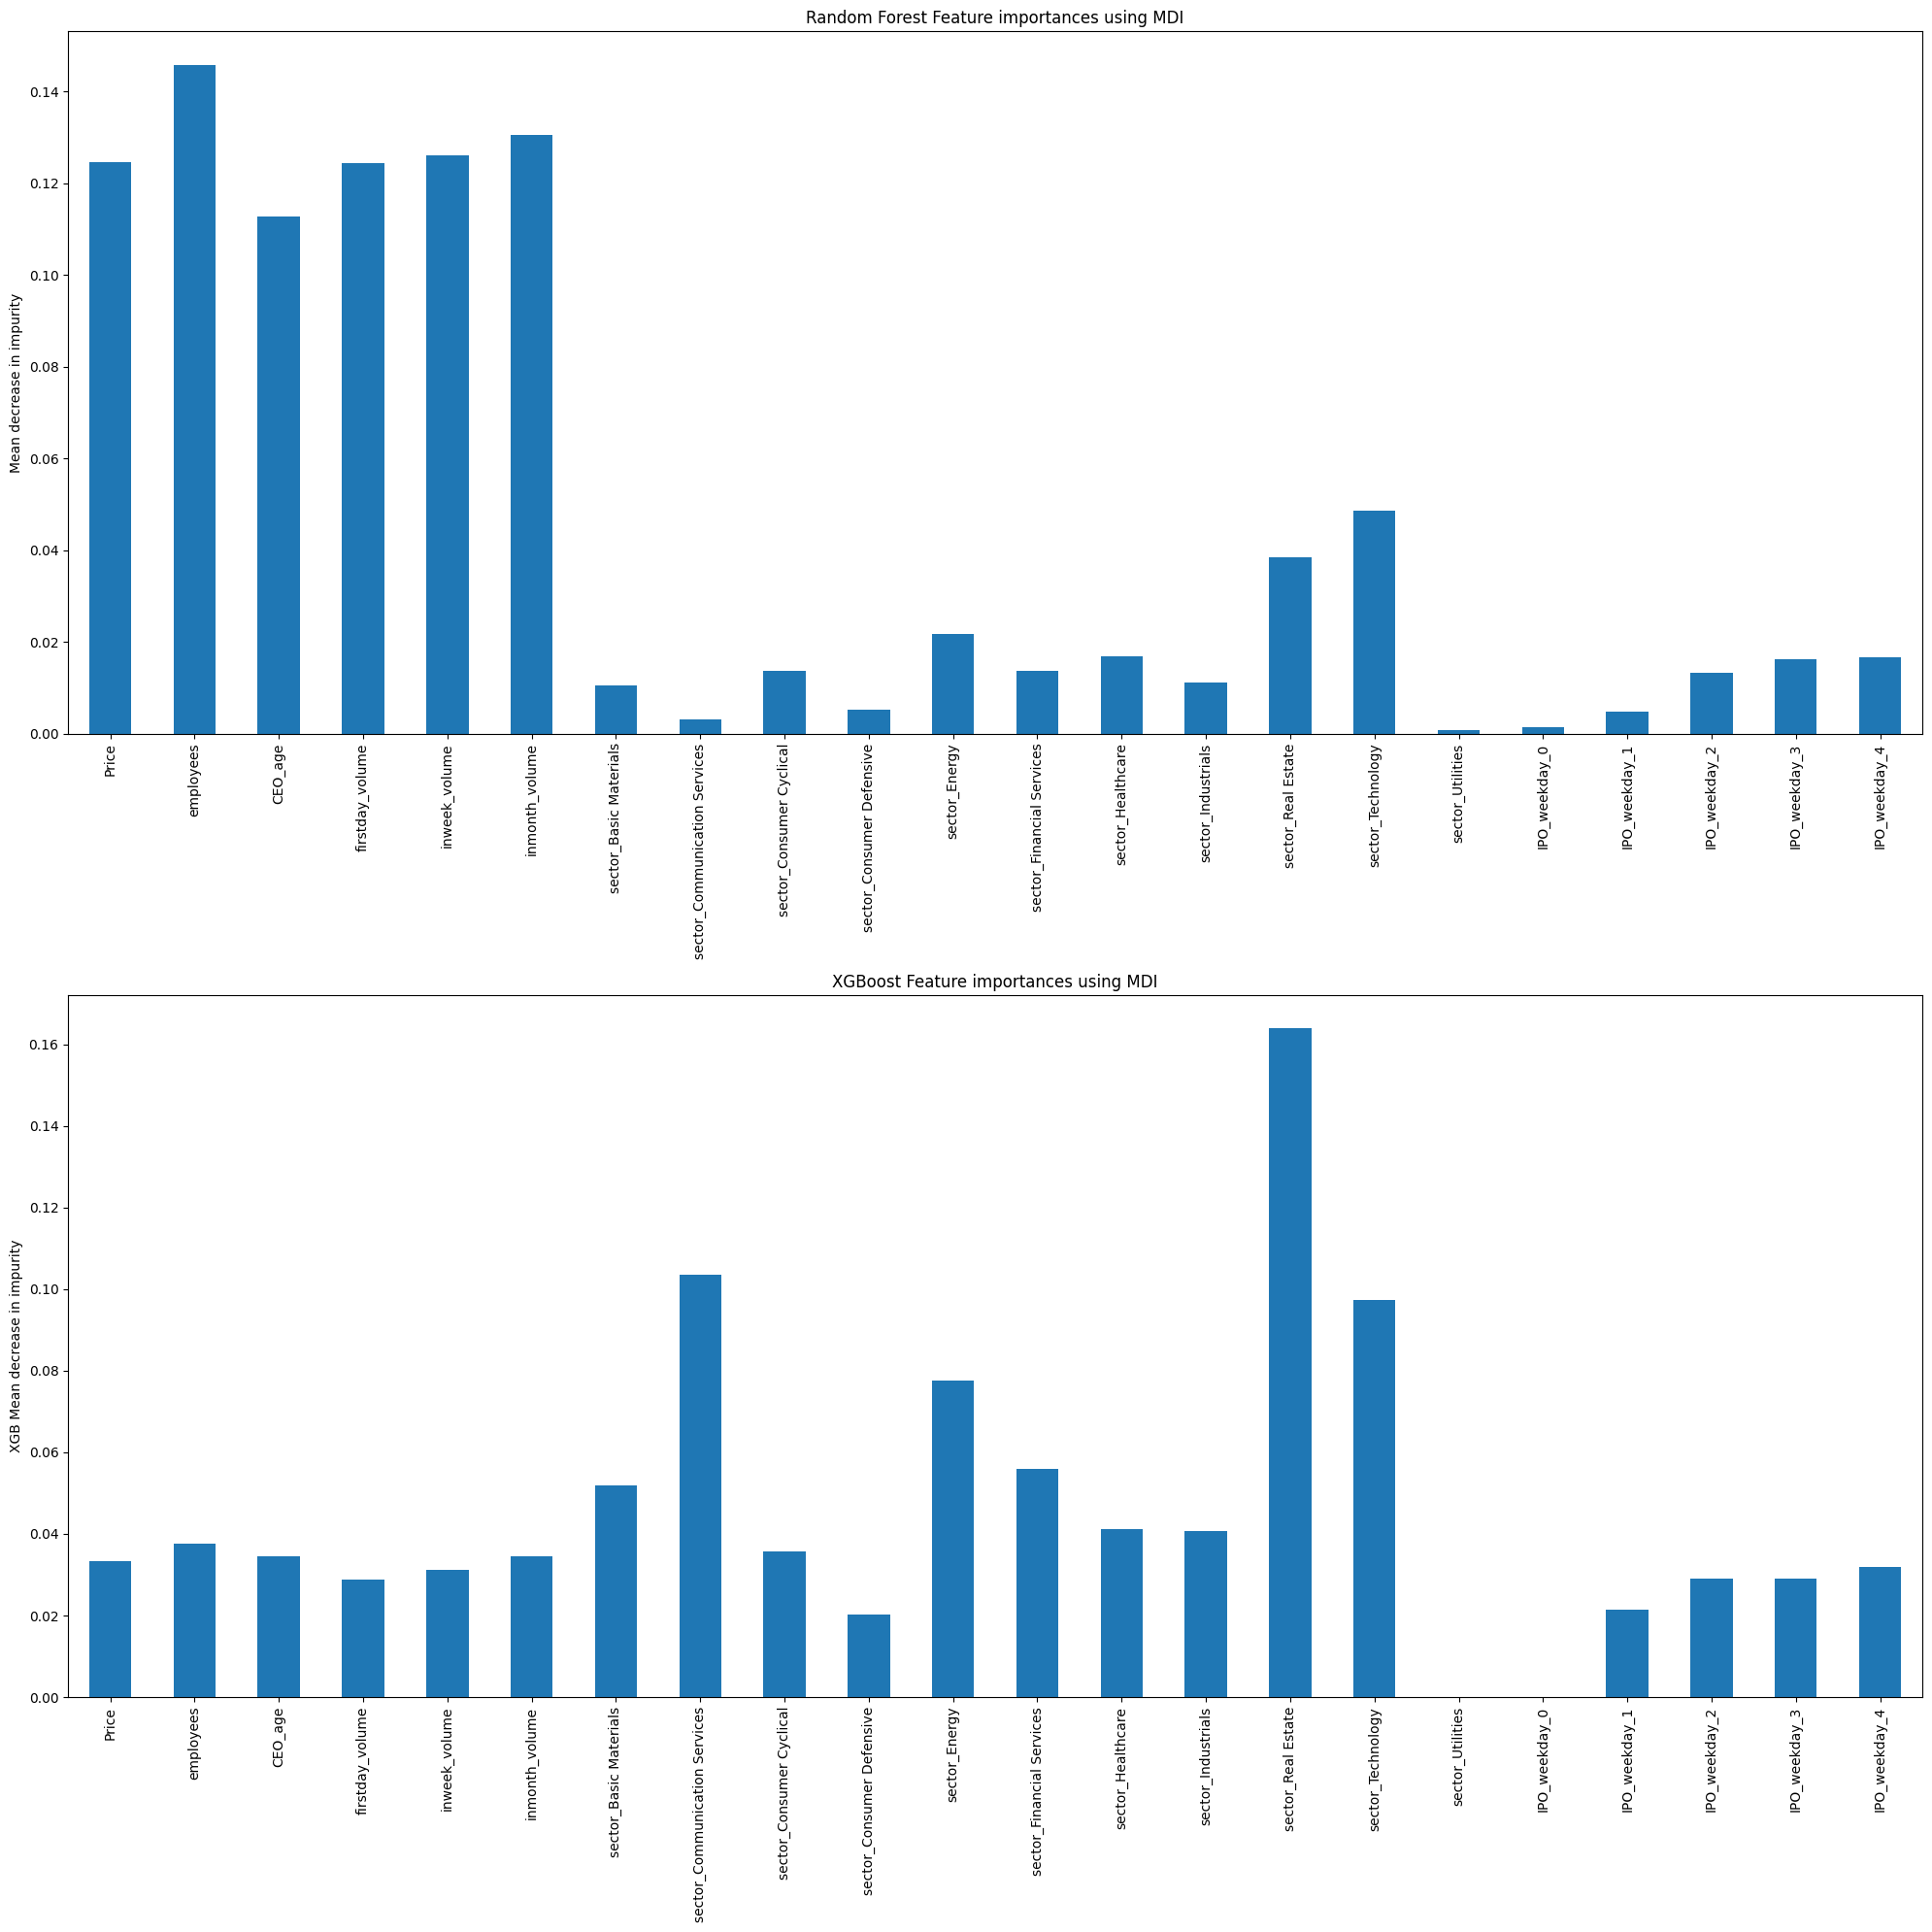

In [141]:
#Looking at feature importances across models

#Feature importance for rf model
feature_names = [col for col in X.columns]
rf_d_importance = rf_random_d.best_estimator_.feature_importances_
xgb_d_importance = xgb_random_d.best_estimator_.feature_importances_

rf_d_importance = pd.Series(rf_d_importance, index=feature_names)
xgb_d_importance = pd.Series(xgb_d_importance, index=feature_names)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20,20))
rf_d_importance.plot.bar(ax=ax1)
xgb_d_importance.plot.bar(ax = ax2)
ax1.set_title("Random Forest Feature importances using MDI")
ax1.set_ylabel("Mean decrease in impurity")
ax2.set_title("XGBoost Feature importances using MDI")
ax2.set_ylabel("XGB Mean decrease in impurity")
fig.tight_layout()
